<a href="https://colab.research.google.com/github/Mazxi/loan_default_prediction/blob/main/Loan_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the various library to be used 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

Loading the dataset

In [ ]:
loan_dataset = pd.read_csv('/content/drive/MyDrive/Loan_Default.csv')
loan_dataset.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


Viewing the volumns

In [ ]:
loan_dataset.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
loan_dataset.columns = loan_dataset.columns.str.lower()

In [ ]:
columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness',
          'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization',
          'interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units',
          'credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
loan_dataset.drop(columns,axis=1, inplace =True)

In [ ]:
loan_dataset.head()

,loan_type,loan_amount,rate_of_interest,term,property_value,income,credit_score,age,status,dtir1
0,type1,116500,NaN,360.0,118000.0,1740.0,758,25-34,1,45.0
1,type2,206500,NaN,360.0,NaN,4980.0,552,55-64,1,NaN
2,type1,406500,4.56,360.0,508000.0,9480.0,834,35-44,0,46.0
3,type1,456500,4.25,360.0,658000.0,11880.0,587,45-54,0,42.0
4,type1,696500,4.00,360.0,758000.0,10440.0,602,25-34,0,39.0


In [ ]:
loan_dataset.describe()

,loan_amount,rate_of_interest,term,property_value,income,credit_score,status,dtir1
count,1.486700e+05,112231.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,335.136582,4.978935e+05,6957.338876,699.789103,0.246445,37.732932
std,1.839093e+05,0.561391,58.409084,3.599353e+05,6496.586382,115.875857,0.430942,10.545435
min,1.650000e+04,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.000000,5.000000
25%,1.965000e+05,3.625000,360.000000,2.680000e+05,3720.000000,599.000000,0.000000,31.000000
50%,2.965000e+05,3.990000,360.000000,4.180000e+05,5760.000000,699.000000,0.000000,39.000000
75%,4.365000e+05,4.375000,360.000000,6.280000e+05,8520.000000,800.000000,0.000000,45.000000
max,3.576500e+06,8.000000,360.000000,1.650800e+07,578580.000000,900.000000,1.000000,61.000000


In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148670 non-null  object 
 1   loan_amount       148670 non-null  int64  
 2   rate_of_interest  112231 non-null  float64
 3   term              148629 non-null  float64
 4   property_value    133572 non-null  float64
 5   income            139520 non-null  float64
 6   credit_score      148670 non-null  int64  
 7   age               148470 non-null  object 
 8   status            148670 non-null  int64  
 9   dtir1             124549 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 11.3+ MB


In [ ]:
loan_dataset.shape

(148670, 10)

In [ ]:
loan_dataset.duplicated().sum()

6

In [ ]:
loan_dataset.drop_duplicates(inplace = True)

In [ ]:
loan_dataset.duplicated().sum()

0

In [ ]:
loan_dataset.isna().sum()

loan_type               0
loan_amount             0
rate_of_interest    36437
term                   41
property_value      15096
income               9146
credit_score            0
age                   200
status                  0
dtir1               24115
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
loan_dataset[['rate_of_interest', 'term','property_value','income','dtir1']] = imputer.fit_transform(loan_dataset[['rate_of_interest', 'term','property_value','income','dtir1']])

In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='most_frequent') 
loan_dataset[['age']] = imputer.fit_transform(loan_dataset[['age']])

In [ ]:
loan_dataset.isna().sum()



loan_type           0
loan_amount         0
rate_of_interest    0
term                0
property_value      0
income              0
credit_score        0
age                 0
status              0
dtir1               0
dtype: int64

In [ ]:
loan_dataset.columns

Index(['loan_type', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'credit_score', 'age', 'status', 'dtir1'],
      dtype='object')

In [ ]:
loan_dataset['income'].mean()

6957.392164451898

In [ ]:
mask = loan_dataset['income'] < 2000
mask.value_counts()

False    140706
True       7958
Name: income, dtype: int64

In [ ]:
loan_dataset['income'] = loan_dataset['income'].apply(lambda x: x if x not in mask else loan_dataset['income'].mean())

In [ ]:
loan_dataset['age'].value_counts()

45-54    34919
35-44    32815
55-64    32533
65-74    20744
25-34    19141
>74       7175
<25       1337
Name: age, dtype: int64

In [ ]:
loan_dataset['rate_of_interest'].min()

0.0

In [ ]:
loan_dataset['rate_of_interest'].mean()

4.045481969579513

In [ ]:
mask= loan_dataset['rate_of_interest'] == 0
mask.value_counts()

False    148663
True          1
Name: rate_of_interest, dtype: int64

In [ ]:
loan_dataset['rate_of_interest'] = loan_dataset['rate_of_interest'].apply(lambda x: x if x not in mask else loan_dataset['rate_of_interest'].mean())

In [ ]:
loan_dataset['rate_of_interest'].mean()

4.049983858453122

In [ ]:
loan_dataset['rate_of_interest'].min()

2.125

Data Visualization

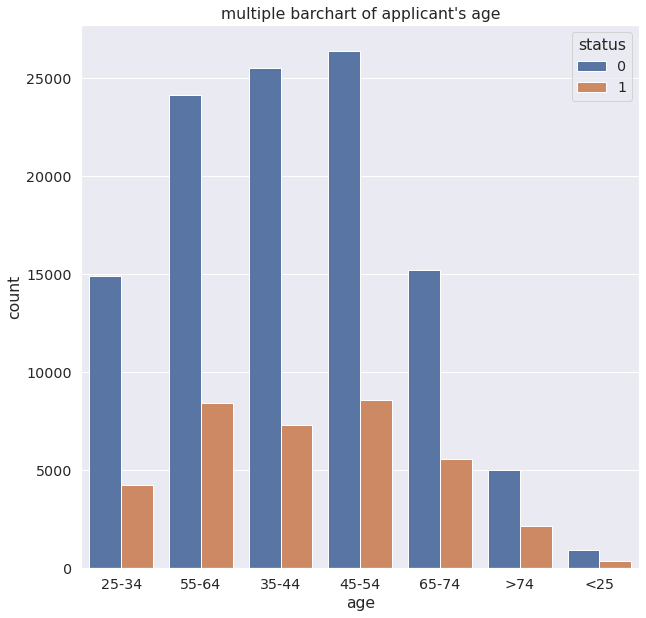

In [ ]:
sns.countplot(data= loan_dataset , x = 'age', hue = 'status')
plt.title("multiple barchart of applicant's age");


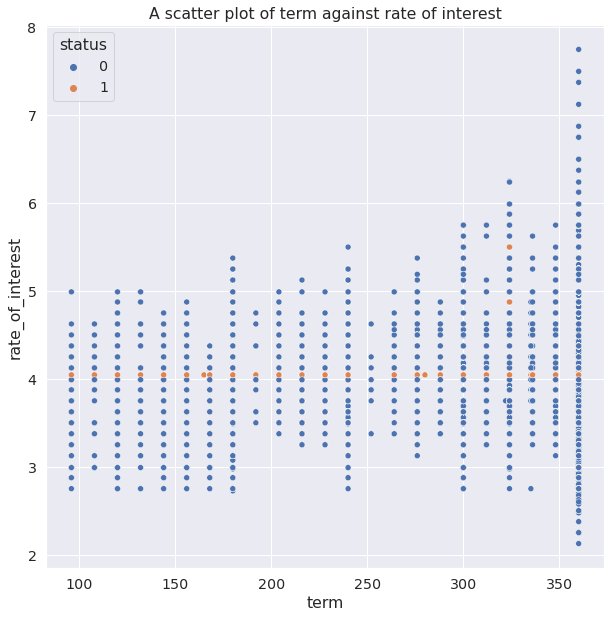

In [ ]:
sns.scatterplot(data = loan_dataset, x = 'term', y = 'rate_of_interest', hue = 'status');
plt.title("A scatter plot of term against rate of interest");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


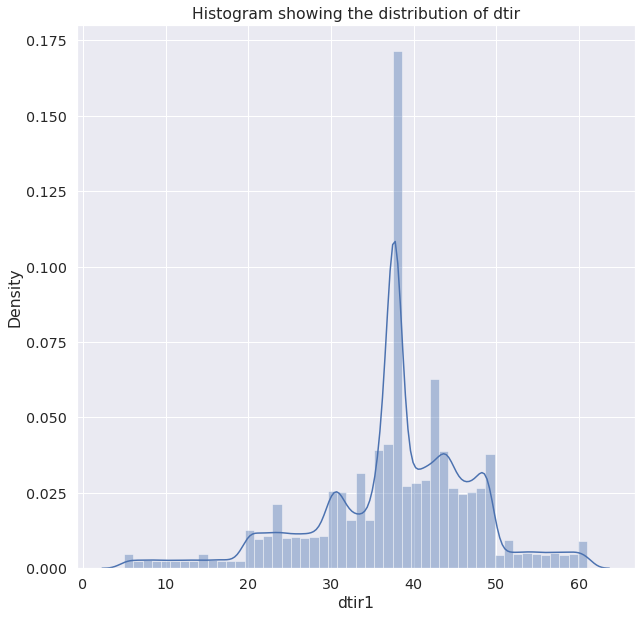

In [ ]:
sns.distplot(loan_dataset.dtir1)
plt.title("Histogram showing the distribution of dtir");

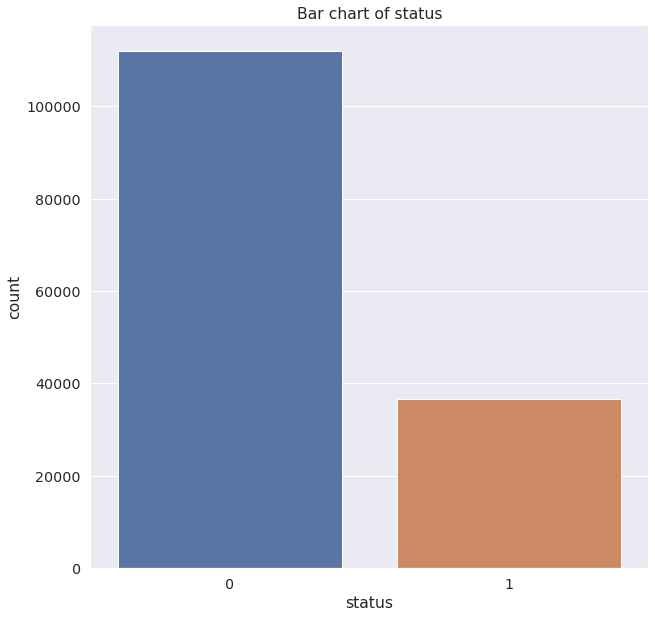

In [ ]:
sns.countplot(data = loan_dataset, x = 'status')
plt.title("Bar chart of status");

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


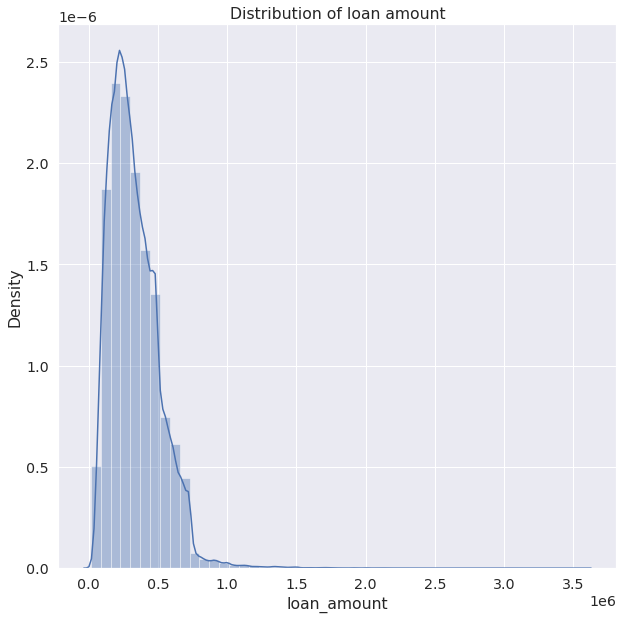

In [ ]:
sns.distplot(loan_dataset.loan_amount)
plt.title("Distribution of loan amount");

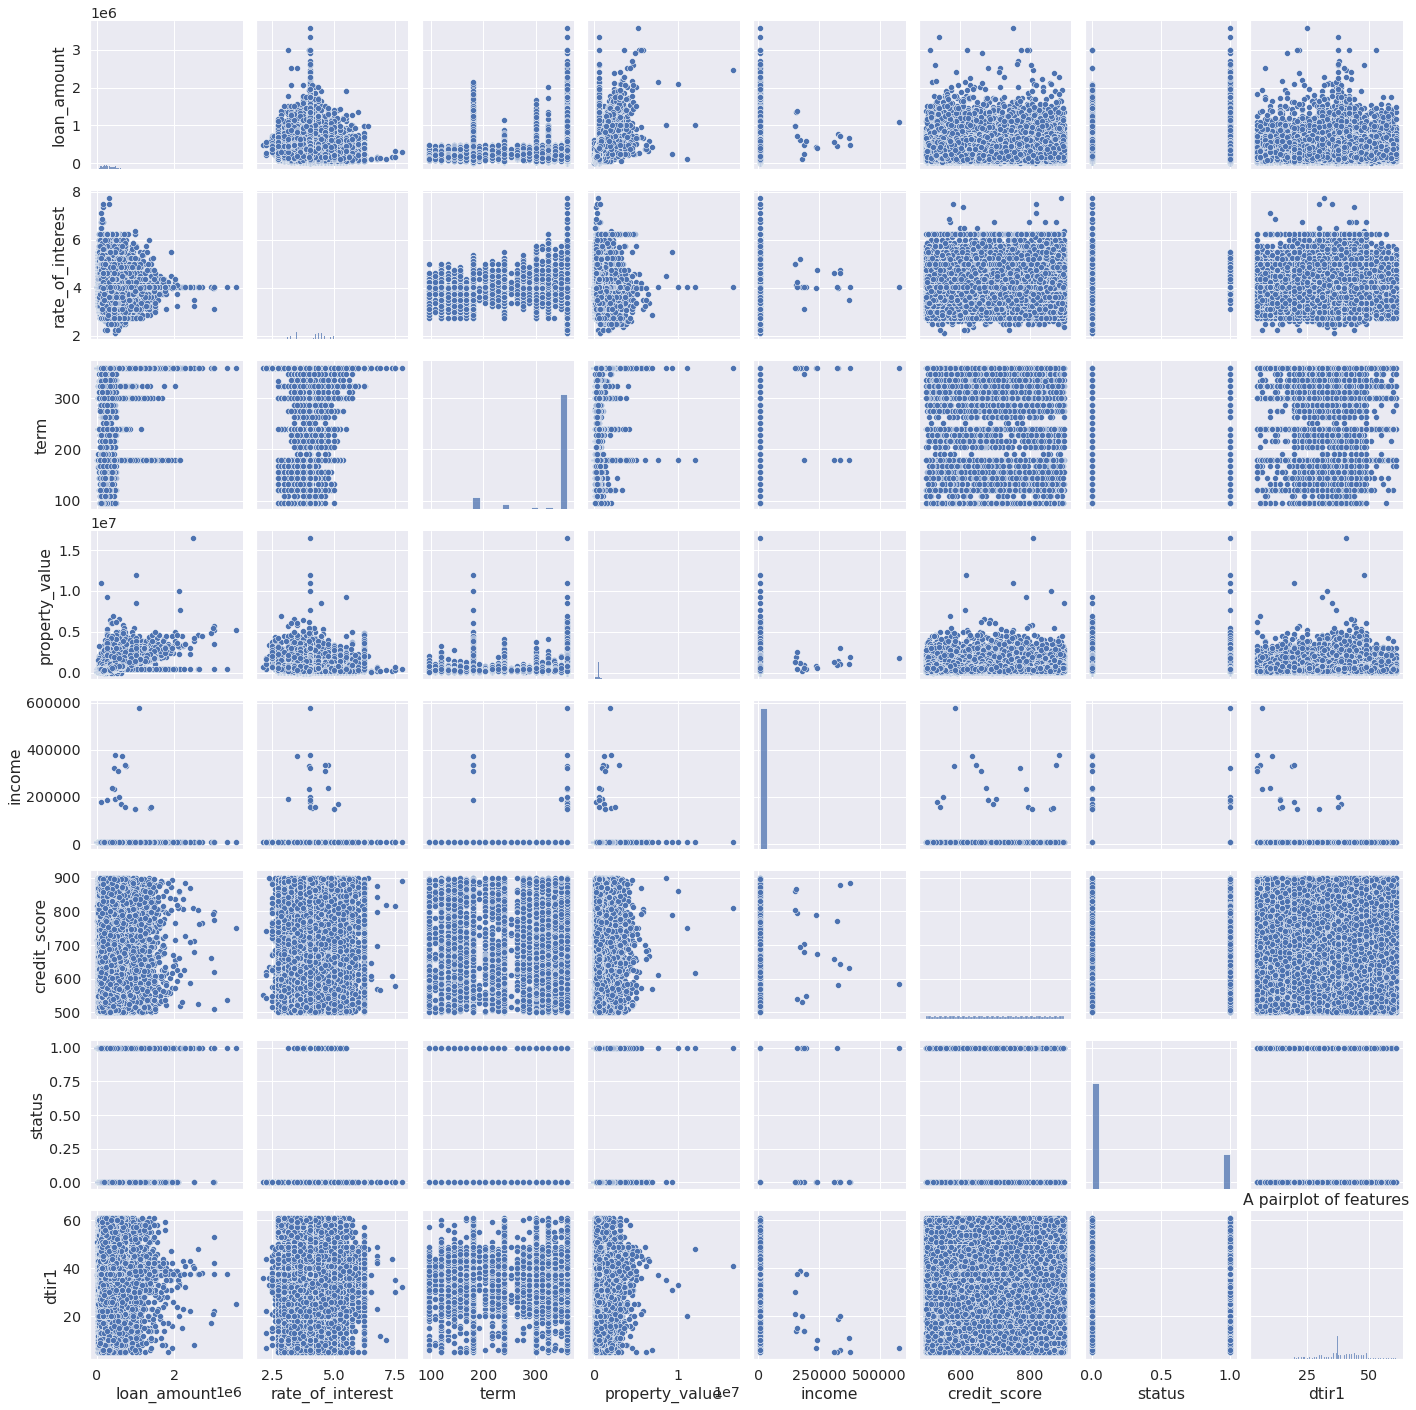

In [ ]:
sns.pairplot(loan_dataset)
plt.title("A pairplot of features");

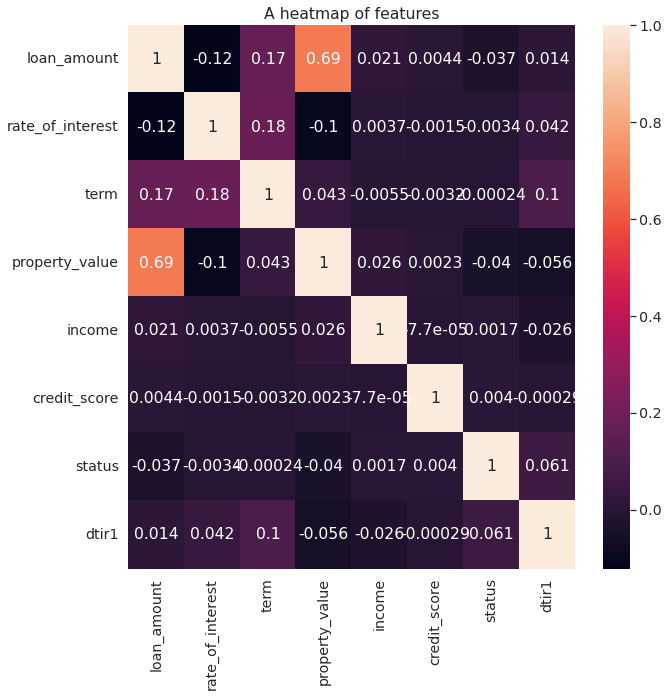

In [ ]:
sns.heatmap(loan_dataset.corr(), annot= True)
plt.title("A heatmap of features");

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_type         148664 non-null  object 
 1   loan_amount       148664 non-null  int64  
 2   rate_of_interest  148664 non-null  float64
 3   term              148664 non-null  float64
 4   property_value    148664 non-null  float64
 5   income            148664 non-null  float64
 6   credit_score      148664 non-null  int64  
 7   age               148664 non-null  object 
 8   status            148664 non-null  int64  
 9   dtir1             148664 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 16.5+ MB


Data Processing

In [ ]:
loan_dataset = pd.get_dummies(loan_dataset, columns=['loan_type','age'], drop_first=True)

In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148664 entries, 0 to 148669
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amount       148664 non-null  int64  
 1   rate_of_interest  148664 non-null  float64
 2   term              148664 non-null  float64
 3   property_value    148664 non-null  float64
 4   income            148664 non-null  float64
 5   credit_score      148664 non-null  int64  
 6   status            148664 non-null  int64  
 7   dtir1             148664 non-null  float64
 8   loan_type_type2   148664 non-null  uint8  
 9   loan_type_type3   148664 non-null  uint8  
 10  age_35-44         148664 non-null  uint8  
 11  age_45-54         148664 non-null  uint8  
 12  age_55-64         148664 non-null  uint8  
 13  age_65-74         148664 non-null  uint8  
 14  age_<25           148664 non-null  uint8  
 15  age_>74           148664 non-null  uint8  
dtypes: float64(5), int64

In [ ]:
loan_dataset.shape

(148664, 16)

In [ ]:
x = loan_dataset.drop('status', axis=1)
y = loan_dataset['status']

In [ ]:
x.shape

(148664, 15)

In [ ]:
y.shape

(148664,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [ ]:
x_train

,loan_amount,rate_of_interest,term,property_value,income,credit_score,dtir1,loan_type_type2,loan_type_type3,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
6575,576500,3.375000,360.0,6508000.0,6957.392164,669,43.0,0,0,0,0,0,0,0,1
12465,396500,3.625000,360.0,438000.0,6957.392164,759,39.0,0,1,1,0,0,0,0,0
24033,96500,4.250000,360.0,158000.0,6957.392164,606,35.0,0,0,0,1,0,0,0,0
36066,236500,3.990000,360.0,408000.0,6957.392164,524,39.0,0,0,0,0,1,0,0,0
81326,356500,3.625000,360.0,438000.0,6957.392164,712,48.0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119798,276500,4.250000,360.0,288000.0,6957.392164,710,30.0,0,0,0,1,0,0,0,0
133230,176500,4.045482,300.0,248000.0,6957.392164,845,47.0,0,0,0,0,1,0,0,0
106883,466500,3.875000,360.0,1078000.0,6957.392164,612,24.0,0,0,1,0,0,0,0,0
55068,116500,4.375000,180.0,448000.0,6957.392164,536,48.0,0,0,0,0,0,1,0,0


In [ ]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

Building models starts here

In [ ]:
y_train.value_counts()

0    78491
1    78491
Name: status, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[32756   780]
 [  637 10427]]
0.959583648984672


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[32664   872]
 [  134 10930]]
0.9809433697350046


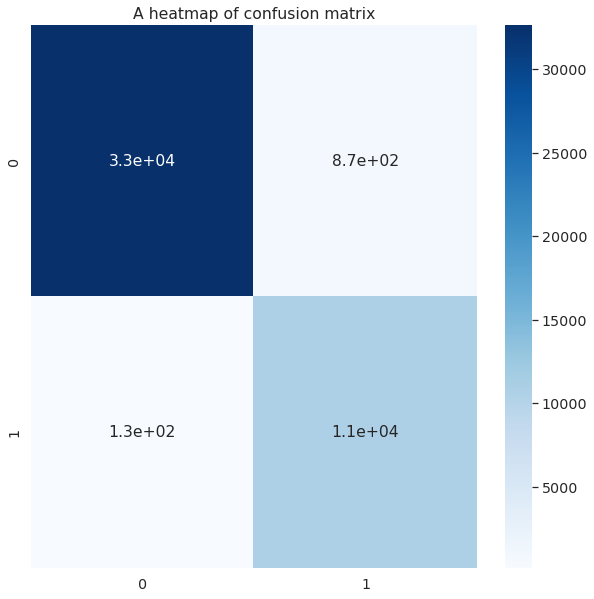

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True, cmap="Blues")
plt.title("A heatmap of confusion matrix");

In [ ]:
precision_score(y_test, y_pred)

0.9261142179291646

In [ ]:
recall_score(y_test, y_pred)

0.9878886478669558

In [ ]:
f1_score(y_test, y_pred)

0.9560045482375579